In [1]:
from wiggler_radiation.transmission_data import transmission_function
from wigrad import Wiggler, WigglerRadiationSimulator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wiggler = Wiggler()
x_max = 0.007257142857142857
y_max = x_max/np.sqrt(2)
n_x = 500
n_y = int(n_x/np.sqrt(2))
n_l = 80
l_min = 0.85
l_max = 1.3
x_step = x_max/(n_x-1)
y_step = y_max/(n_y-1)
l_step = (l_max-l_min)/(n_l-1)
mesh = (np.linspace(x_step/2, x_max+x_step/2, n_x),
        np.linspace(y_step/2, y_max+y_step/2, n_y),
        np.linspace(l_min, l_max, n_l))
spectral_transmission = transmission_function(mesh[2])
wr_sim = WigglerRadiationSimulator(
    wiggler,
    mesh,
    gamma=100/0.511,
    harmonics=[1],
    aperture='ellipse',
    only_calc_sum_of_both_polarizations=True,  # if False, then both polarizations are calculated separately
    spectral_transmission=spectral_transmission)

In these spectral data I assume that the transmission sharply goes to zero where the data are not given in the specs.

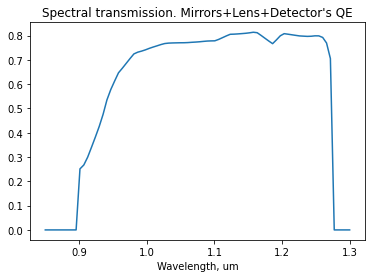

In [3]:
plt.plot(mesh[2], spectral_transmission)
plt.title("Spectral transmission. Mirrors+Lens+Detector's QE")
plt.xlabel("Wavelength, um")
plt.show()

In [4]:
wr_sim.calc_photon_flux_on_meshgrid()

In [5]:
wr_sim.extend_results_using_symmetries()

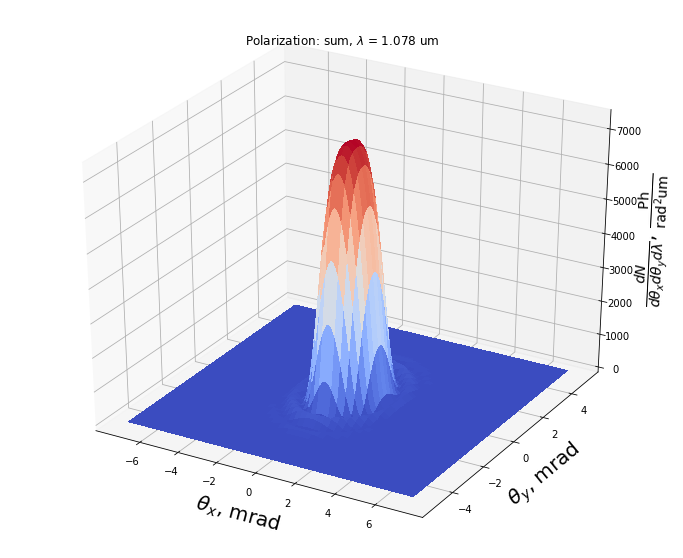

In [6]:
wr_sim.show_angular_distribution(index_of_lambda=int(n_l/2))

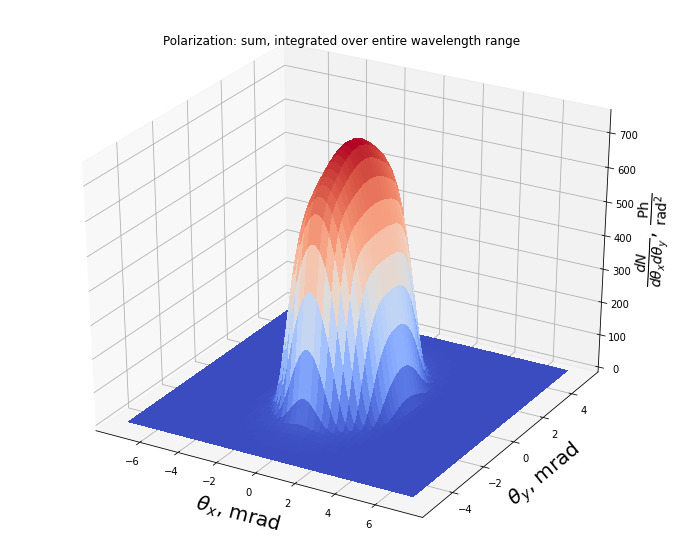

In [7]:
wr_sim.show_angular_distribution(polarization='sum')

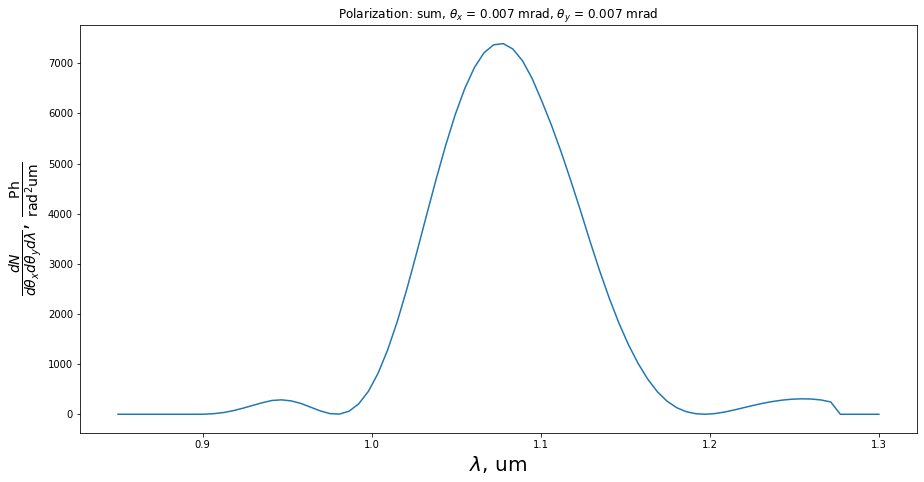

In [8]:
wr_sim.show_spectral_distribution(angular_indexes_tuple=(n_x,n_y))

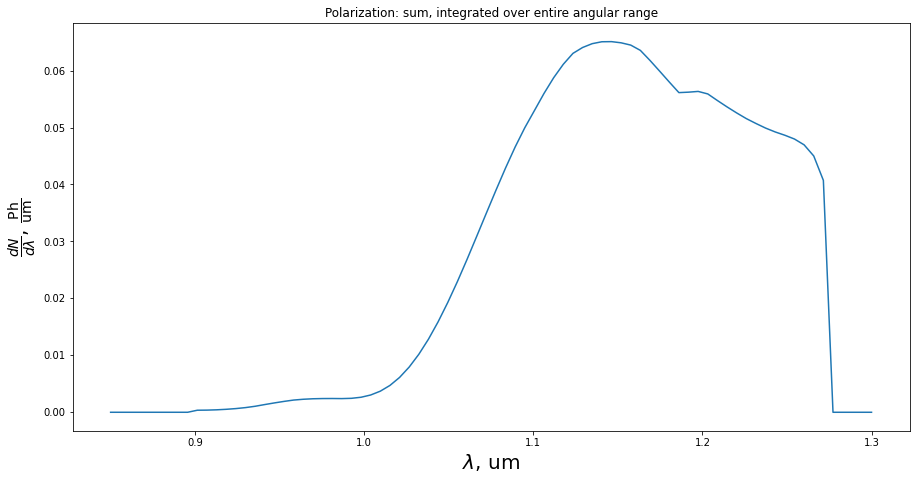

In [9]:
wr_sim.show_spectral_distribution(polarization='sum')

In [10]:
wr_sim.get_total_photon_flux(polarization='sum')

0.01221971387651638